### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 3
### Due: Monday, Feb 14th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 14th.

---

## Problem 1

Consider a family with two children. Assume that the probability of females and males being born is equal, i.e. $p(F)=0.5$ and $p(M)=0.5$. Remember that "given" means your calculation is conditioned on some already fixed data or outcome. 

1) What is the probability of one male and one female **GIVEN** that the first child is male. 

2) What is the probability of two females **GIVEN** that at least one child is female.

3) What is the probability of two females **GIVEN** that the older child is female.

You will find it easiest to answer these questions by sketching a "tree diagram" to visualize the options for the oldest child, and the branching options for the youngest child. 

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

Given a family with two children, there are four possibilities:

- 1 male, then another male (BB)
- 1 female, then another female (FF)
- 1 male, then a female (MF)
- 1 female, then a male (FM)

Each possibility is equally likely given that the p(F) = p(M) = 0.5, so the probability of each possibility is 1/4 = 0.25

Tree Representation:

       M         F              (Older Child)
     /   \     /   \
    M     F   M     F           (Younger Child)
    
1. Knowing that the first child is male, we need only to consider the left subtree. To have one male and one female child, the second child must be female. The only possibilities applicable are MM and MF. Thus, the probability of one male child and one female child is 1/2.

2. Because at least one child is female, we can eliminate the possibility of BB. Out of the three possibilities left, only one represents two female children. Thus, the probability of two female children given that at least one child is female is 1/3.

3. Given that the older child is female, we need only to consider the right subtree. To have two female children, the younger child must be female as well. The only possibilities applicable to the right subtree are FM and FF. Thus, the probability of two female children given that the older child is female is 1/2.


## Problem 2

The data in hw3_populations.txt (source: scipy-lectures.org) describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years:


create a Python script to

1. plot hw3_populations.txt (using matlab)


2. calculate and output:

    a) The mean, median and std of the populations of each species for the years in the period.
    
    b) The year each species had the largest population.
    
    c) The species that has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))
    
    d) The years were any of the populations is above 50000. (Hint: comparisons and np.any)
    
    e) The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
    
    f) Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).



### Solution



In [2]:
import numpy as np
import matplotlib.pyplot as plt

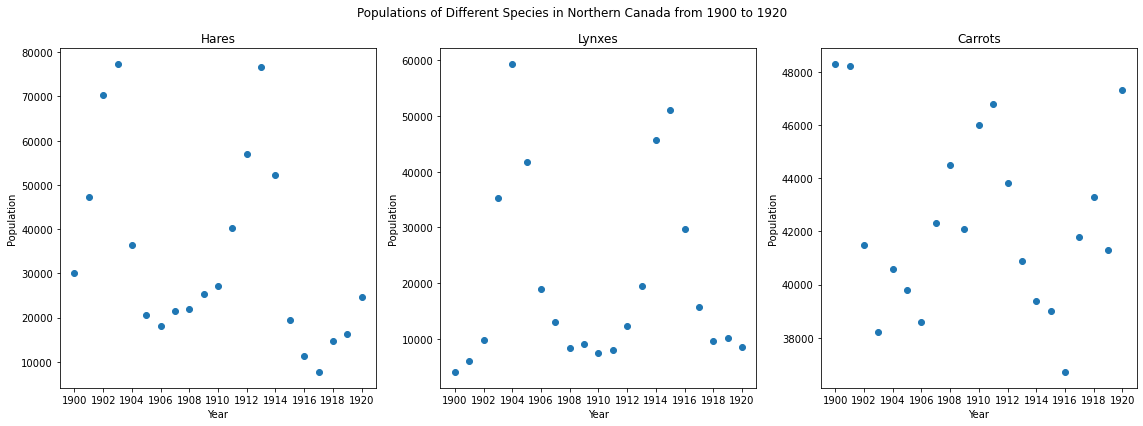

In [137]:
# Load data from txt file into NumPy array
data = np.loadtxt('hw3_populations.txt')
data = data[:,:].astype(int)

# Making slices of array for later use
years = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]
labels = ['Hares', 'Lynxes', 'Carrots']

# 1. Plot the data 
fig,ax = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Populations of Different Species in Northern Canada from 1900 to 1920')

# Scatter plot for Year vs. Hare Population
ax[0].scatter(years, hare)
ax[0].set_title('Hares')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Population')
ax[0].set_xticks(range(1900, 1921, 2))

# Scatter plot for Year vs. Lynx Population
ax[1].scatter(years, lynx)
ax[1].set_title('Lynxes')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Population')
ax[1].set_xticks(range(1900, 1921, 2))

# Scatter plot for Year vs. Carrot Population
ax[2].scatter(years, carrot)
ax[2].set_title('Carrots')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Population')
ax[2].set_xticks(range(1900, 1921, 2))

plt.tight_layout()
plt.show()

In [138]:
# 2a. Loop through each species and calculate mean, median, and std of populations

for i in range(1, 4):
    print('{}:\nMean: {}\nMedian: {}\nStandard Deviation: {}\n'.format(labels[i - 1],
                                                                       np.mean(data[:,i]),
                                                                       np.median(data[:,i]),
                                                                       np.std(data[:,i])))

Hares:
Mean: 34080.95238095238
Median: 25400.0
Standard Deviation: 20897.906458089667

Lynxes:
Mean: 20166.666666666668
Median: 12300.0
Standard Deviation: 16254.591536908763

Carrots:
Mean: 42400.0
Median: 41800.0
Standard Deviation: 3322.5062255844787



In [139]:
# 2b. Calculate and ouput the year that each species had the largest population
for i in range(1, 4):
    print(f'{labels[i - 1]}: {years[np.argmax(data[:,i])]}') # Finds index of max element and returns the year

Hares: 1903
Lynxes: 1904
Carrots: 1900


In [140]:
# 2c. Calculate and output the species that has the largest population for each year.

#Taking the last column of argsort array to get the column index of largest value for each row (year)
max_arr = (np.argsort(data[:,1:4]))[:, -1]

for i in range(0, 21):
    print(f'{years[i]}: {labels[max_arr[i]]}')

1900: Carrots
1901: Carrots
1902: Hares
1903: Hares
1904: Lynxes
1905: Lynxes
1906: Carrots
1907: Carrots
1908: Carrots
1909: Carrots
1910: Carrots
1911: Carrots
1912: Hares
1913: Hares
1914: Hares
1915: Lynxes
1916: Carrots
1917: Carrots
1918: Carrots
1919: Carrots
1920: Carrots


In [141]:
# 2d. Output the years where any of the populations is above 50,000.

# Print out the value in the first column (year) for any row that contains a population over 50,000
print('Years where any of the populations is over 50,000:')
print(*data[np.any(data[:, 1:4] > 50000, axis=1), 0], sep=', ')

Years where any of the populations is over 50,000:
1902, 1903, 1904, 1912, 1913, 1914, 1915


In [142]:
# 2e. Calculate and output the top 2 years for each species when they had the lowest populations.

#Taking the first 2 rows of argsort array to get the row indices of smallest 2 values for each column (species)
min_arr = (np.argsort(data[:,1:4], axis=0))[0:2, :]

for i in range(0, 3):
    print(f'{labels[i]}: ', end='')
    print(*years[min_arr[0:2, i]], sep=', ')

Hares: 1917, 1916
Lynxes: 1900, 1901
Carrots: 1916, 1903


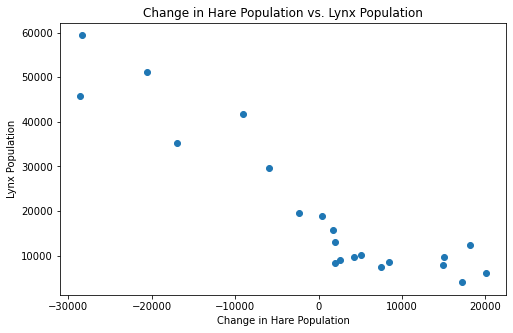

array([[ 1.        , -0.91792485],
       [-0.91792485,  1.        ]])

In [145]:
# 2f. Compare (plot) the change in hare population and the number of lynxes and check the correlation.

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

plt.scatter(np.gradient(hare), lynx)
plt.title('Change in Hare Population vs. Lynx Population')
plt.xlabel('Change in Hare Population')
plt.ylabel('Lynx Population')
plt.show()

np.corrcoef(np.gradient(hare), lynx)

The change in hare population and number of lynxes have a correlation coefficient of about -0.918. This is close to being a perfect negative correlation (-1). This implies that when the change in hare population is greater, the number of lynxes tends to be smaller. This makes sense given the predator-prey relationship between lynxes and hares.